In [ ]:
import os
import pandas as pd

def load_all_results(folder_path, file_prefix="base_results", file_count=16):
    df_dict = {}
    for i in range(1, file_count + 1):
        filename = f"{file_prefix}({i}).csv"
        file_path = os.path.join(folder_path, filename)
        if os.path.exists(file_path):
            key = os.path.splitext(filename)[0]
            df_dict[key] = pd.read_csv(file_path)
        else:
            print(f"File not found: {file_path}")
    return df_dict

folder = "../results/different_processing_results/"
df_dict = load_all_results(folder)


In [ ]:
def plot_metric_comparison_by_model(results_dict, model_list, title = "Train vs Test Metrics by Model"):
    """
    results_dict: słownik wyników z load_all_results()
    model_list: lista krotek (run_id, model_name, label)
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc_roc']
    train_cols = [f'train_{m}' for m in metrics]
    test_cols = [f'test_{m}' for m in metrics]


    colors = {
        'accuracy': '#636EFA',   # deep blue
        'precision': '#EF553B',  # soft red
        'recall': '#00CC96',     # teal
        'f1_score': '#AB63FA',   # lavender
        'auc_roc': '#FFA15A'     # orange
    }

    all_data = []
    for run_id, model_name, label in model_list:
        df_key = f"base_results({run_id})"
        df = results_dict.get(df_key)
        if df is None:
            print(f"Missing file: {df_key}")
            continue
        row = df[df.iloc[:, 0] == model_name]
        if row.empty:
            print(f"Model {model_name} not found in {df_key}")
            continue
        row = row.reset_index(drop=True)
        for train_metric, test_metric, metric_name in zip(train_cols, test_cols, metrics):
            all_data.append({'Model': label, 'Metric': metric_name, 'Value': row[train_metric][0], 'Dataset': 'train'})
            all_data.append({'Model': label, 'Metric': metric_name, 'Value': row[test_metric][0], 'Dataset': 'test'})

    plot_df = pd.DataFrame(all_data)


    models = plot_df['Model'].unique()
    n_metrics = len(metrics)
    spacing = 1.0
    bar_width = 0.9

    fig, ax = plt.subplots(figsize=(14, 6))

    for i, model in enumerate(models):
        for j, metric in enumerate(metrics):
            base_x = i * (n_metrics + spacing)
            x = base_x + j
            df_subset = plot_df[(plot_df['Model'] == model) & (plot_df['Metric'] == metric)]

            for ds in ['train', 'test']:
                val = df_subset[df_subset['Dataset'] == ds]['Value'].values
                if val.size > 0:
                    alpha = 0.5 if ds == 'train' else 0.8
                    ax.bar(x, val[0], color=colors[metric], alpha=alpha, width=bar_width)


    ax.set_xticks([(i * (n_metrics + spacing)) + (n_metrics - 1) / 2 for i in range(len(models))])
    ax.set_xticklabels(models)
    ax.set_xlabel("")
    ax.set_ylabel("Metric Value")
    ax.set_title(title)
    ax.yaxis.grid(True, linestyle='--', alpha=0.3)
    ax.set_axisbelow(True)
    ax.set_ylim(0.7, 1.0)

    metric_handles = [plt.Rectangle((0, 0), 1, 1, color=colors[m], alpha=1.0) for m in metrics]
    metric_labels = metrics

    transparency_handles = [
        plt.Rectangle((0, 0), 1, 1, color='gray', alpha=0.5),
        plt.Rectangle((0, 0), 1, 1, color='gray', alpha=0.8)
    ]
    transparency_labels = ["train", "test"]

    legend2 = ax.legend(transparency_handles, transparency_labels, title="Dataset", loc='lower left', bbox_to_anchor=(1, 0.80))
    legend1 = ax.legend(metric_handles, metric_labels, title="Metric", loc='upper left', bbox_to_anchor=(1, 0.7))
    ax.add_artist(legend2)

    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()


## Result on default settings

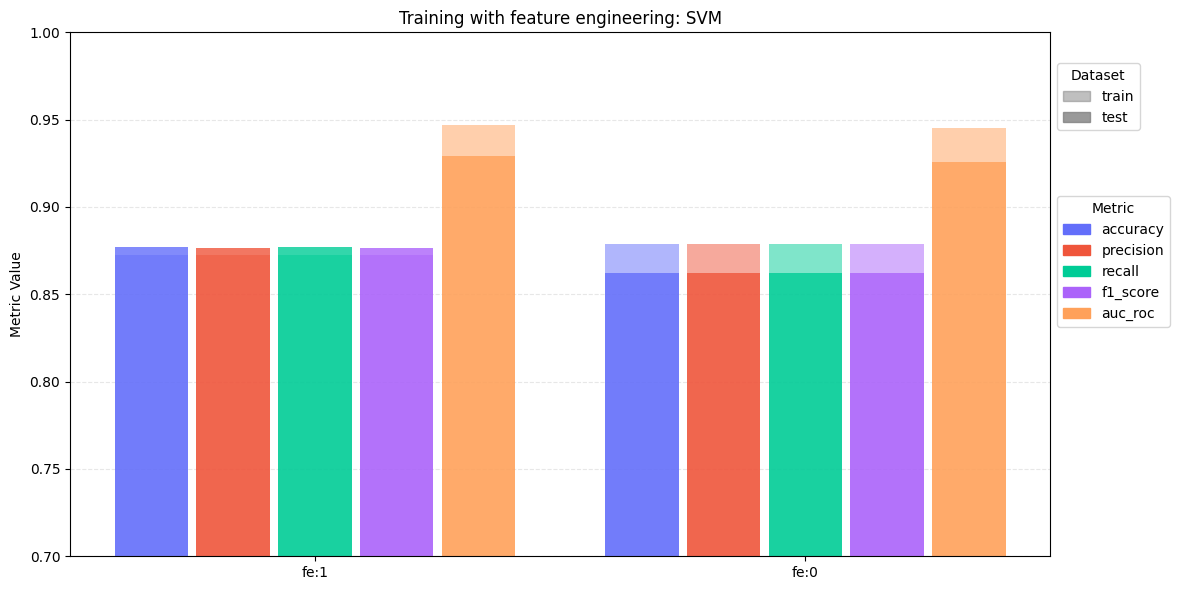

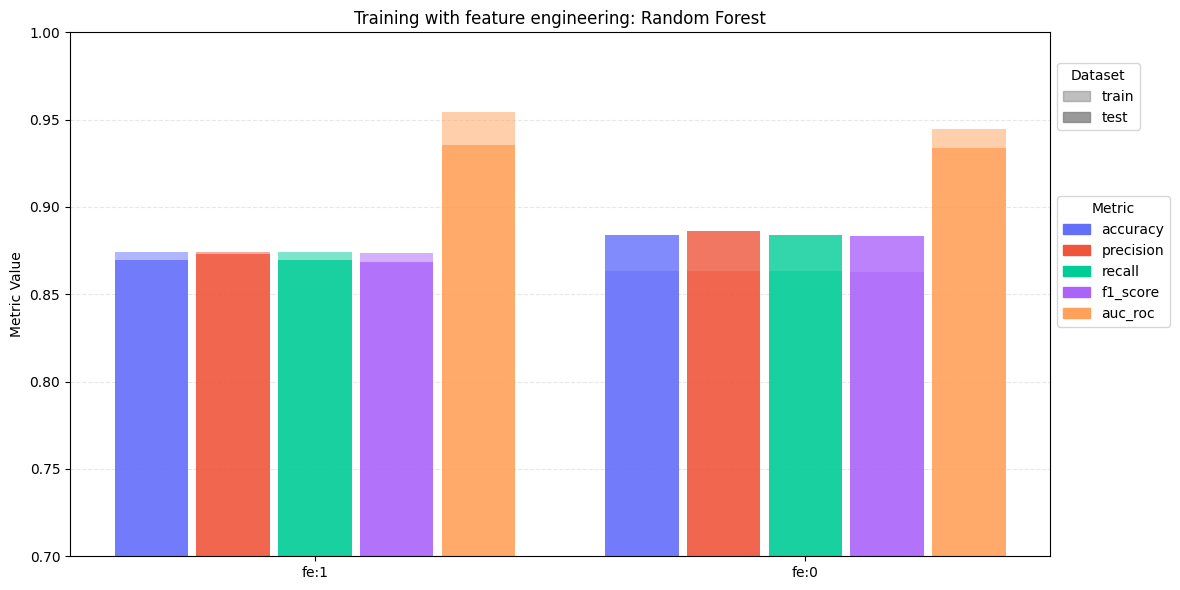

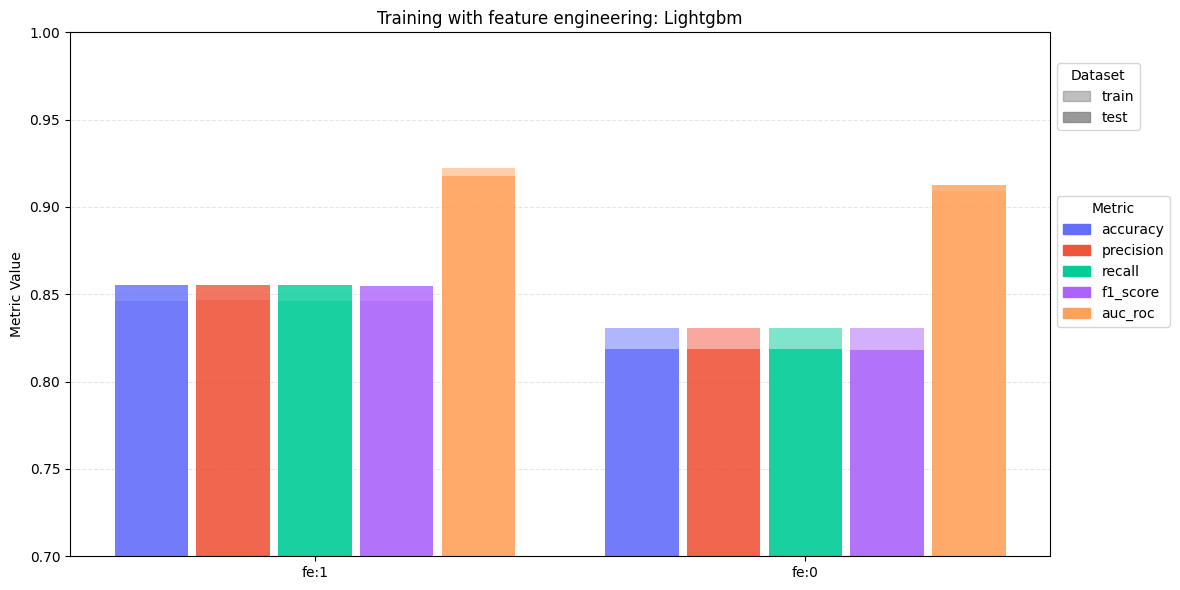

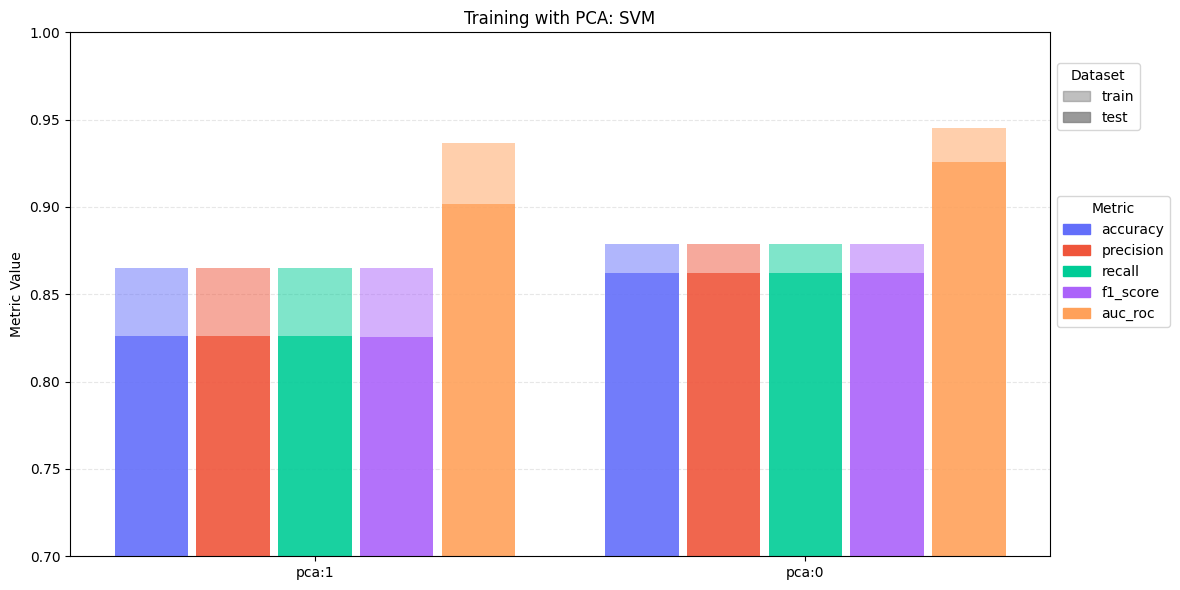

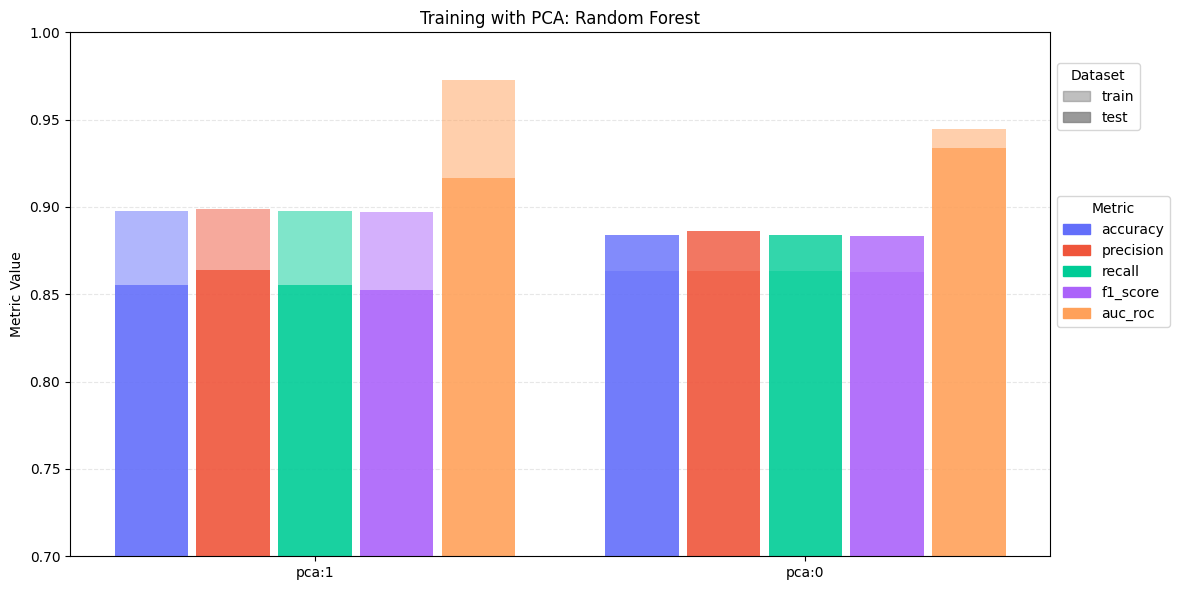

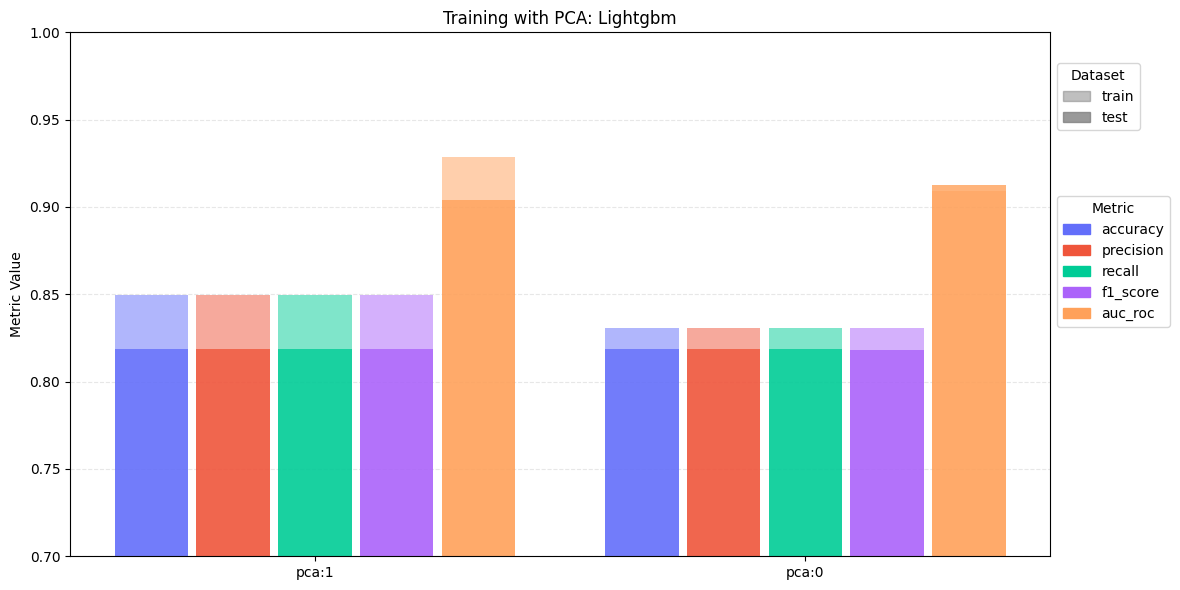

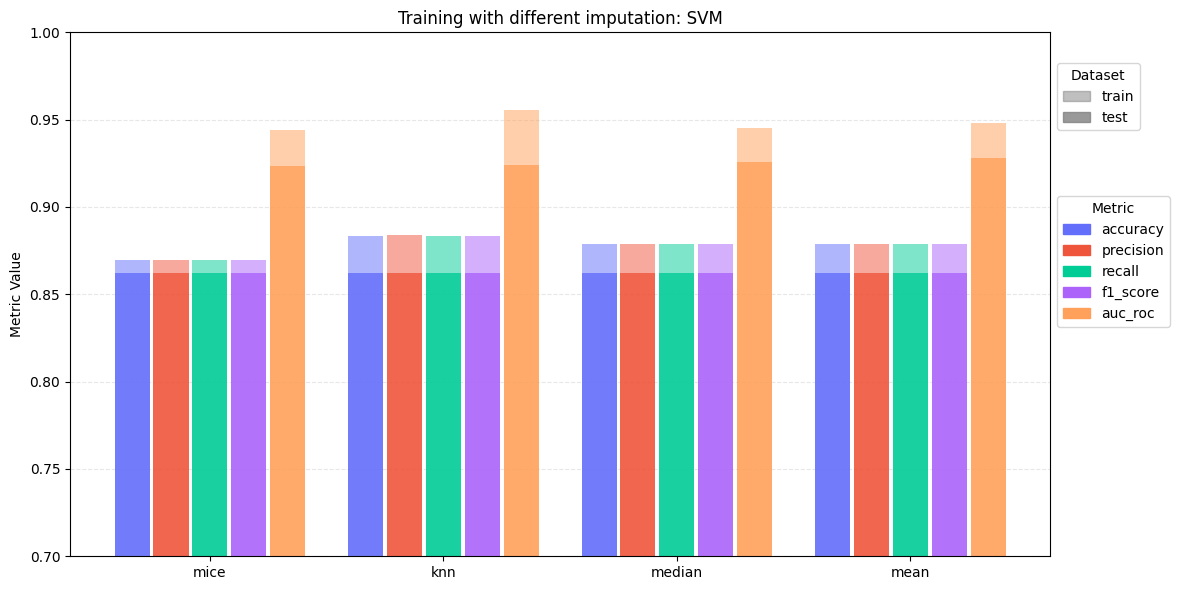

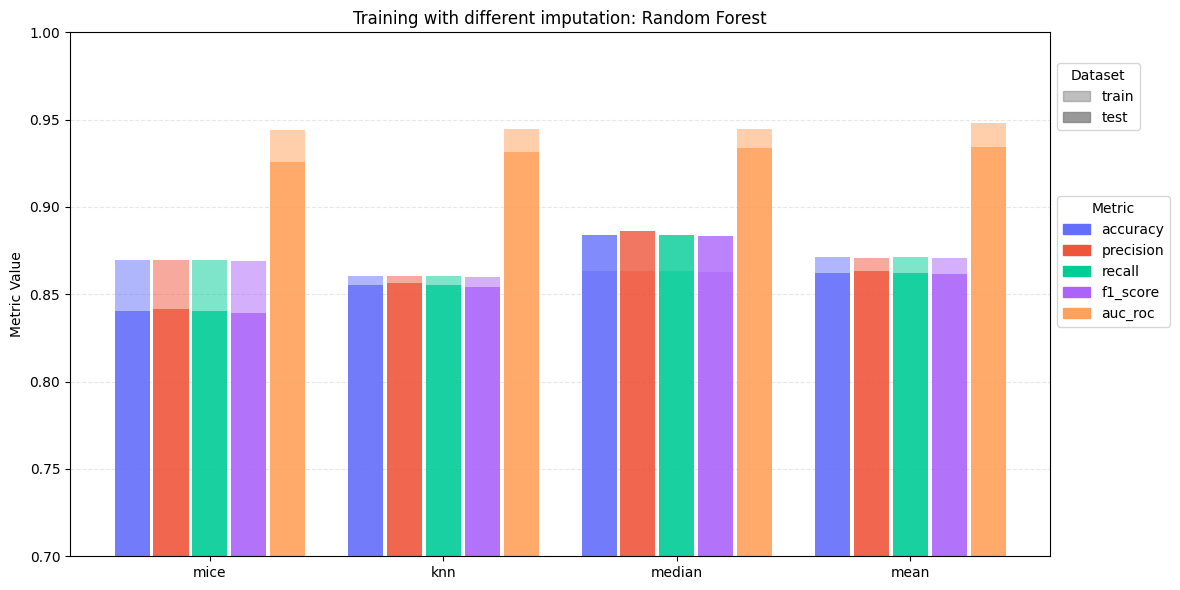

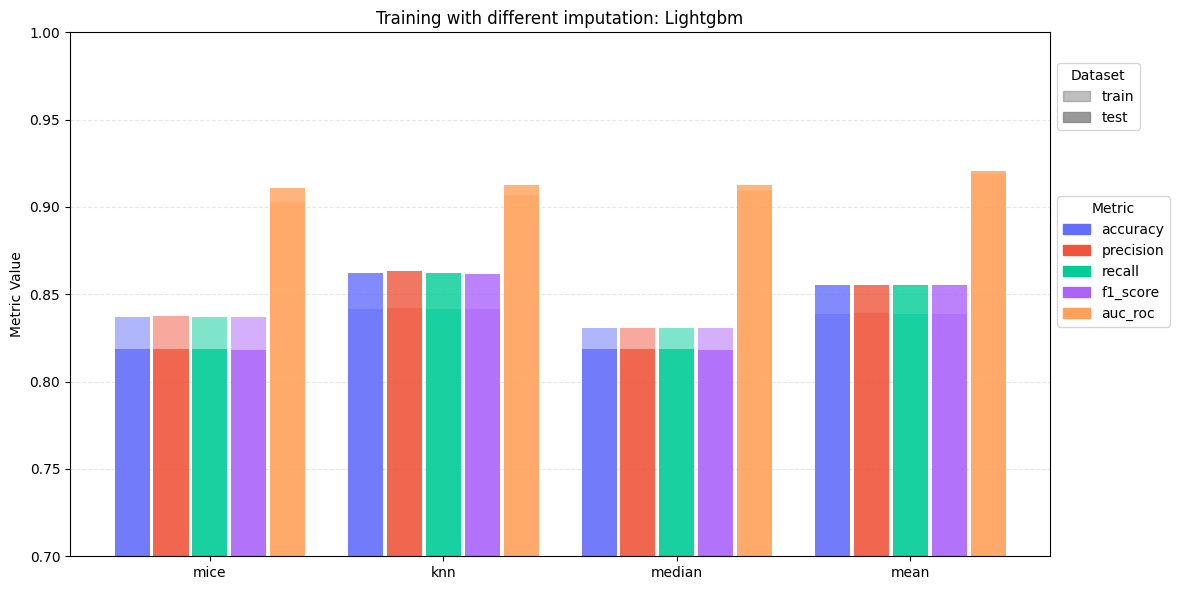

In [ ]:

plot_metric_comparison_by_model(
    results_dict=df_dict,
    model_list=[
        (11, 'svm_1', 'fe:1'),
        (12, 'svm_1', 'fe:0')
    ],
    title="Training with feature engineering: SVM"
)


plot_metric_comparison_by_model(
    results_dict=df_dict,
    model_list=[
        (11, 'random_forest_1', 'fe:1'),
        (12, 'random_forest_1', 'fe:0')
    ],
    title="Training with feature engineering: Random Forest"
)

plot_metric_comparison_by_model(
    results_dict=df_dict,
    model_list=[
        (11, 'lightgbm_1', 'fe:1'),
        (12, 'lightgbm_1', 'fe:0')
    ], title="Training with feature engineering: Lightgbm"
)


plot_metric_comparison_by_model(
    results_dict=df_dict,
    model_list=[
        (10, 'svm_1', 'pca:1'),
        (12, 'svm_1', 'pca:0')
    ],
    title="Training with PCA: SVM"
)


plot_metric_comparison_by_model(
    results_dict=df_dict,
    model_list=[
        (10, 'random_forest_1', 'pca:1'),
        (12, 'random_forest_1', 'pca:0')
    ],
    title="Training with PCA: Random Forest"
)

plot_metric_comparison_by_model(
    results_dict=df_dict,
    model_list=[
        (10, 'lightgbm_1', 'pca:1'),
        (12, 'lightgbm_1', 'pca:0')
    ], title="Training with PCA: Lightgbm"
)



plot_metric_comparison_by_model(
    results_dict=df_dict,
    model_list=[
        (4, 'svm_1', 'mice'),
        (8, 'svm_1', 'knn'),
        (12, 'svm_1', 'median'),
        (16, 'svm_1', 'mean')
    ],
    title="Training with different imputation: SVM"
)


plot_metric_comparison_by_model(
    results_dict=df_dict,
    model_list=[
        (4, 'random_forest_1', 'mice'),
        (8, 'random_forest_1', 'knn'),
        (12, 'random_forest_1', 'median'),
        (16, 'random_forest_1', 'mean')
    ],
    title="Training with different imputation: Random Forest"
)


plot_metric_comparison_by_model(
    results_dict=df_dict,
    model_list=[
        (4, 'lightgbm_1', 'mice'),
        (8, 'lightgbm_1', 'knn'),
        (12, 'lightgbm_1', 'median'),
        (16, 'lightgbm_1', 'mean')
    ],
    title="Training with different imputation: Lightgbm"
)


## Result on former best

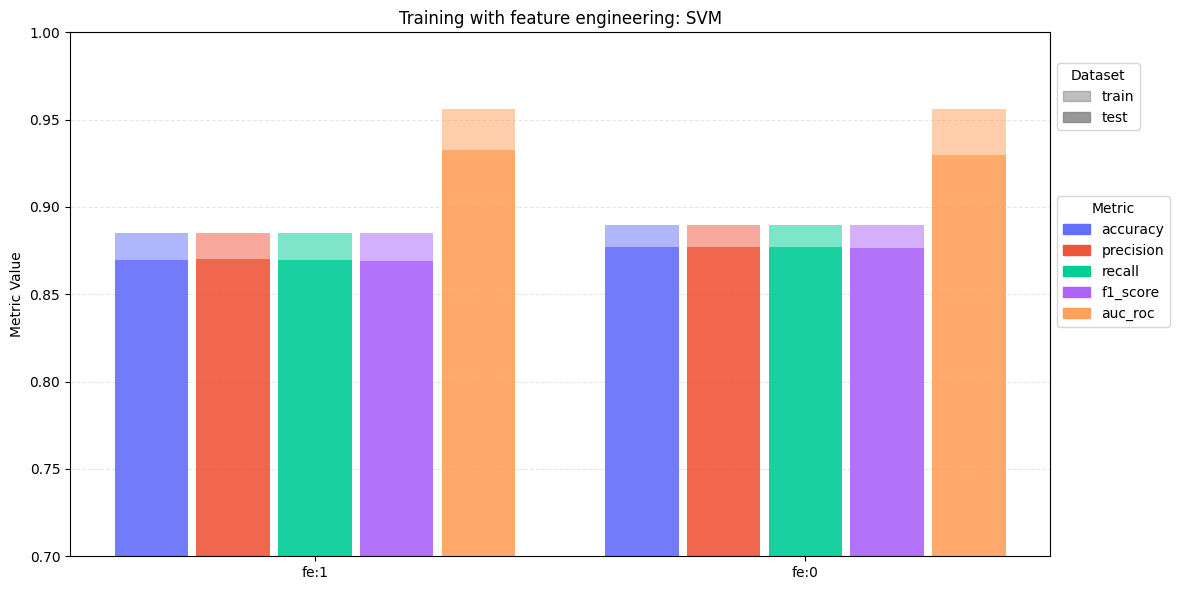

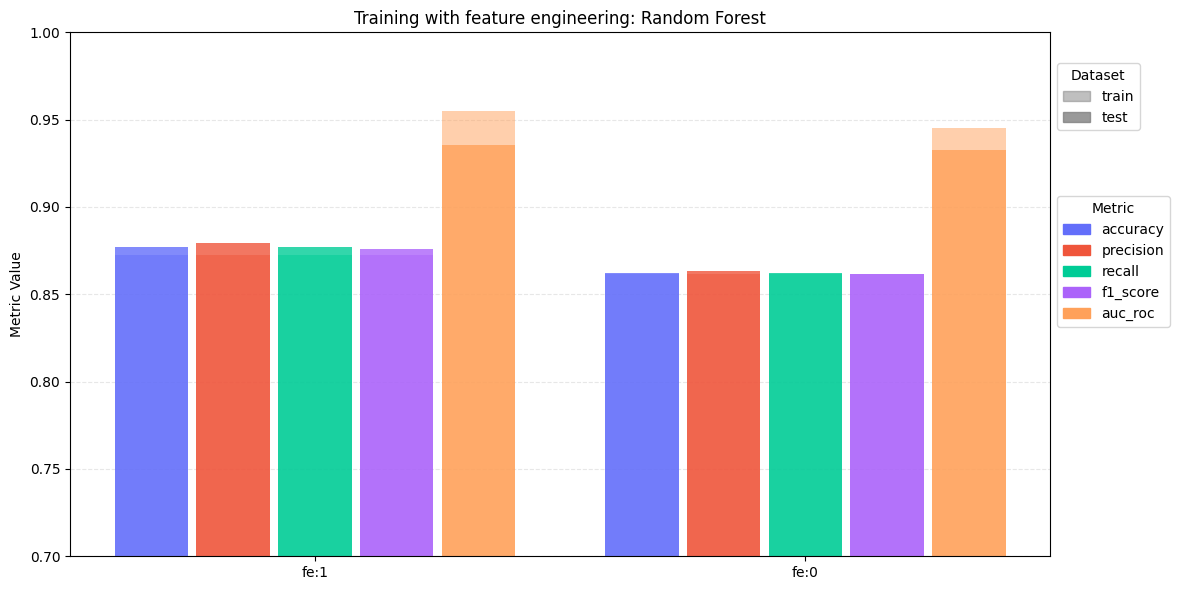

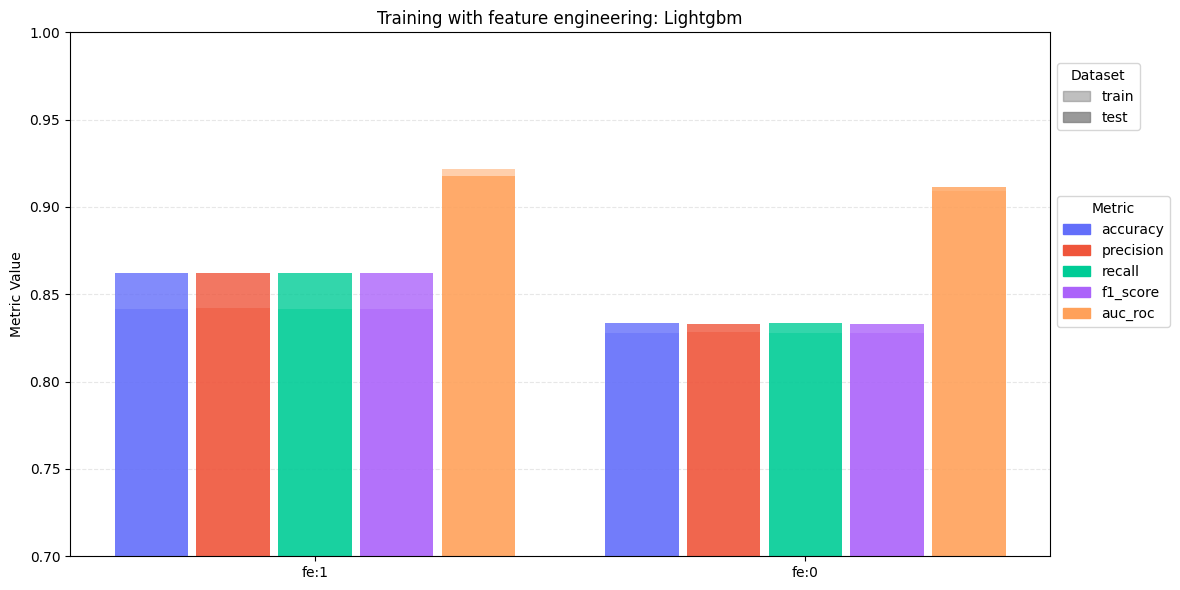

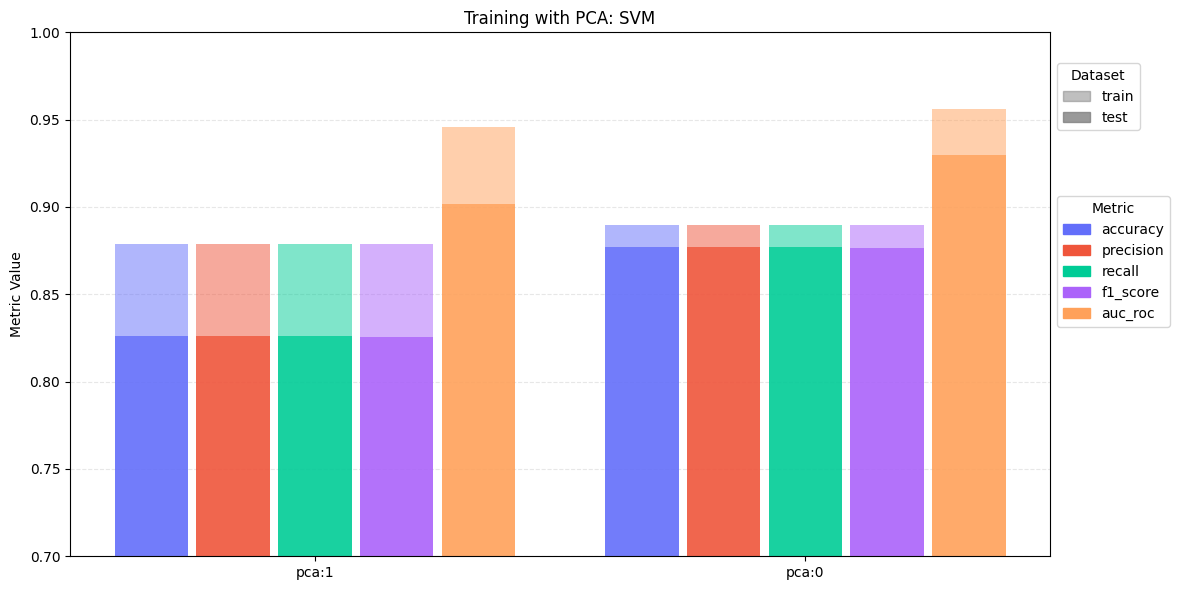

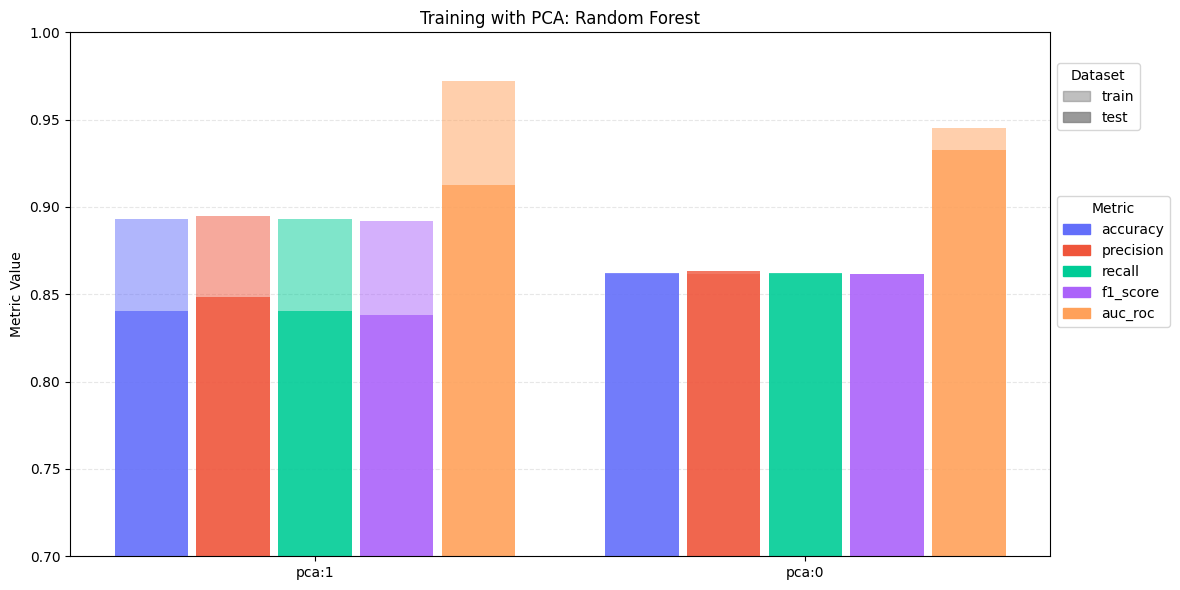

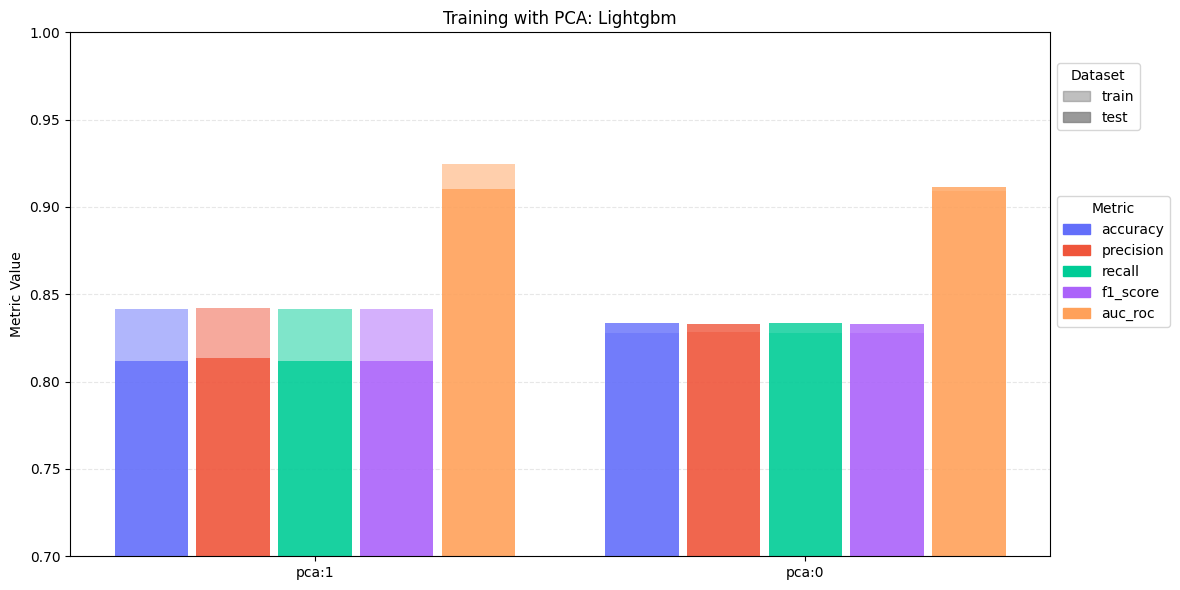

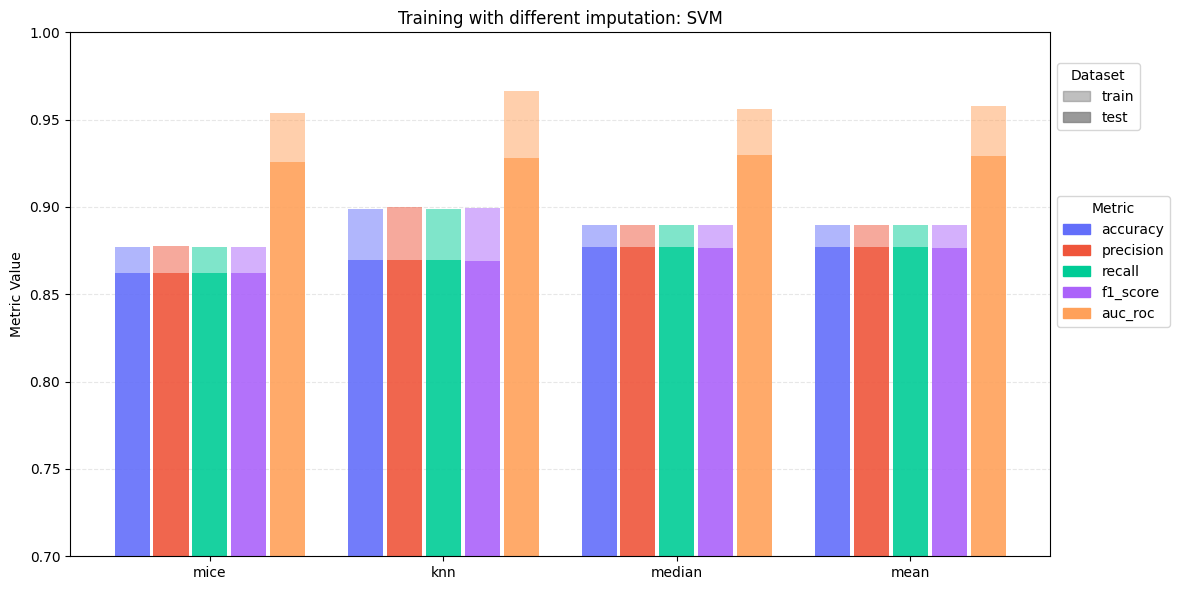

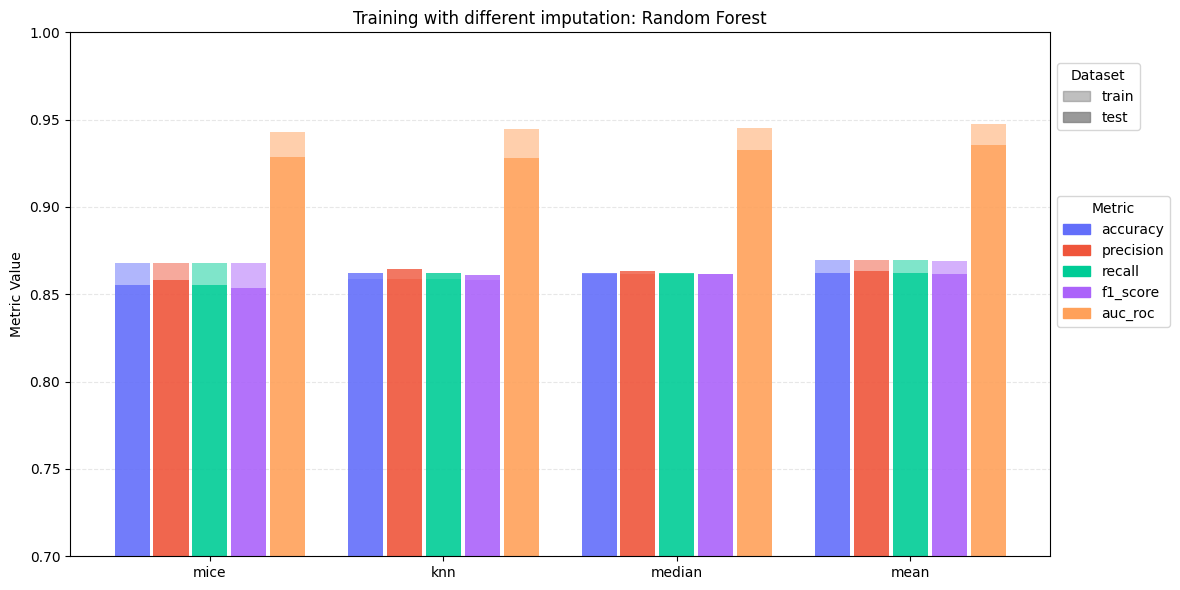

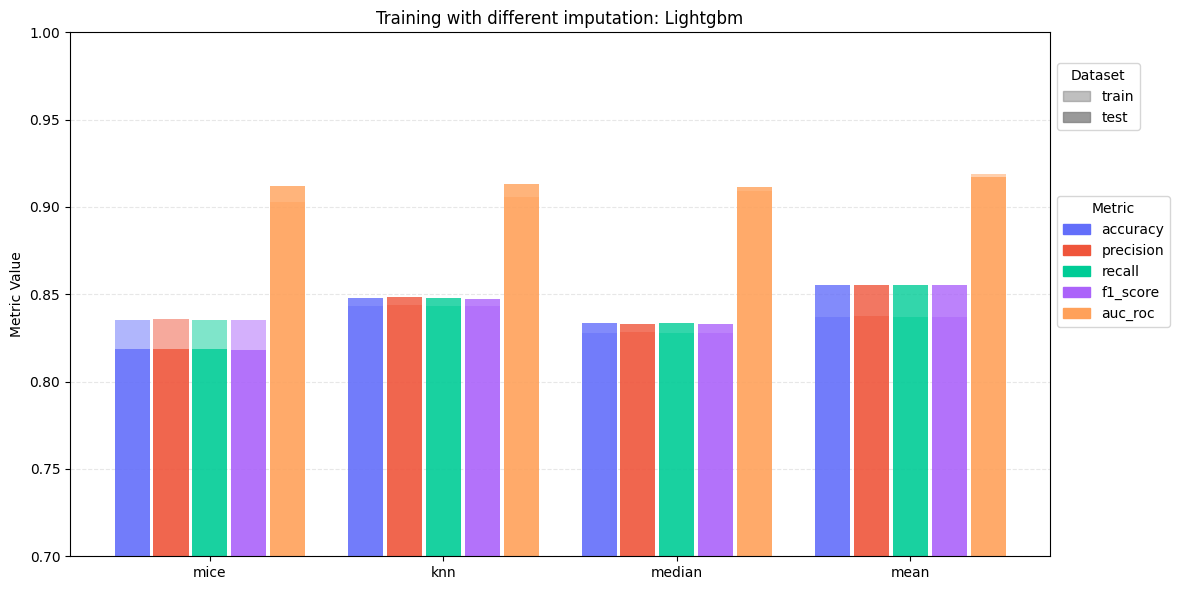

In [ ]:

plot_metric_comparison_by_model(
    results_dict=df_dict,
    model_list=[
        (11, 'svm_3', 'fe:1'),
        (12, 'svm_3', 'fe:0')
    ],
    title="Training with feature engineering: SVM"
)


plot_metric_comparison_by_model(
    results_dict=df_dict,
    model_list=[
        (11, 'random_forest_9', 'fe:1'),
        (12, 'random_forest_9', 'fe:0')
    ],
    title="Training with feature engineering: Random Forest"
)

plot_metric_comparison_by_model(
    results_dict=df_dict,
    model_list=[
        (11, 'lightgbm_8', 'fe:1'),
        (12, 'lightgbm_8', 'fe:0')
    ], title="Training with feature engineering: Lightgbm"
)


plot_metric_comparison_by_model(
    results_dict=df_dict,
    model_list=[
        (10, 'svm_3', 'pca:1'),
        (12, 'svm_3', 'pca:0')
    ],
    title="Training with PCA: SVM"
)


plot_metric_comparison_by_model(
    results_dict=df_dict,
    model_list=[
        (10, 'random_forest_9', 'pca:1'),
        (12, 'random_forest_9', 'pca:0')
    ],
    title="Training with PCA: Random Forest"
)

plot_metric_comparison_by_model(
    results_dict=df_dict,
    model_list=[
        (10, 'lightgbm_8', 'pca:1'),
        (12, 'lightgbm_8', 'pca:0')
    ], title="Training with PCA: Lightgbm"
)



## imputation

plot_metric_comparison_by_model(
    results_dict=df_dict,
    model_list=[
        (4, 'svm_3', 'mice'),
        (8, 'svm_3', 'knn'),
        (12, 'svm_3', 'median'),
        (16, 'svm_3', 'mean')
    ],
    title="Training with different imputation: SVM"
)


plot_metric_comparison_by_model(
    results_dict=df_dict,
    model_list=[
        (4, 'random_forest_9', 'mice'),
        (8, 'random_forest_9', 'knn'),
        (12, 'random_forest_9', 'median'),
        (16, 'random_forest_9', 'mean')
    ],
    title="Training with different imputation: Random Forest"
)


plot_metric_comparison_by_model(
    results_dict=df_dict,
    model_list=[
        (4, 'lightgbm_8', 'mice'),
        (8, 'lightgbm_8', 'knn'),
        (12, 'lightgbm_8', 'median'),
        (16, 'lightgbm_8', 'mean')
    ],
    title="Training with different imputation: Lightgbm"
)


In [ ]:
def plot_metric_comparison_dual(results_dict, model_list_1, model_list_2, super_title="Comparison"):
    import pandas as pd
    import matplotlib.pyplot as plt
    from matplotlib.patches import Rectangle
    from matplotlib.colors import to_rgba

    metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc_roc']
    train_cols = [f'train_{m}' for m in metrics]
    test_cols = [f'test_{m}' for m in metrics]

    base_colors = {
        'accuracy': '#636EFA',
        'precision': '#EF553B',
        'recall': '#00CC96',
        'f1_score': '#AB63FA',
        'auc_roc': '#FFA15A'
    }
    colors_train = {k: to_rgba(v, alpha=0.5) for k, v in base_colors.items()}
    colors_test = {k: to_rgba(v, alpha=1.0) for k, v in base_colors.items()}

    def melt_data(model_list):
        rows = []
        for run_id, model_name, label in model_list:
            df_key = f"base_results({run_id})"
            df = results_dict.get(df_key)
            if df is None:
                print(f" Missing file: {df_key}")
                continue
            row = df[df.iloc[:, 0] == model_name]
            if row.empty:
                print(f" Model {model_name} not found in {df_key}")
                continue
            row = row.reset_index(drop=True)
            for train_metric, test_metric, metric_name in zip(train_cols, test_cols, metrics):
                rows.append({'Model': label, 'Metric': metric_name, 'Value': row[train_metric][0], 'Dataset': 'train'})
                rows.append({'Model': label, 'Metric': metric_name, 'Value': row[test_metric][0], 'Dataset': 'test'})
        return pd.DataFrame(rows)

    df1 = melt_data(model_list_1)
    df2 = melt_data(model_list_2)

    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
    spacing = 1.0
    bar_width = 0.9

    def plot_on_ax(ax, df_plot):
        models = df_plot['Model'].unique()
        for i, model in enumerate(models):
            for j, metric in enumerate(metrics):
                base_x = i * (len(metrics) + spacing)
                x = base_x + j
                df_subset = df_plot[(df_plot['Model'] == model) & (df_plot['Metric'] == metric)]
                for ds in ['train', 'test']:
                    val = df_subset[df_subset['Dataset'] == ds]['Value'].values
                    if val.size > 0:
                        color = colors_train[metric] if ds == 'train' else colors_test[metric]
                        ax.bar(x, val[0], color=color, width=bar_width)

        ax.set_xticks([(i * (len(metrics) + spacing)) + (len(metrics) - 1) / 2 for i in range(len(models))])
        ax.set_xticklabels(models)
        ax.set_ylim(0.7, 1.0)
        ax.grid(True, axis='y', linestyle='--', alpha=0.3)
        ax.set_axisbelow(True)

    plot_on_ax(axes[0], df1)
    plot_on_ax(axes[1], df2)
    axes[0].set_ylabel("Metric Value")

    axes[0].set_xlabel("Default")
    axes[1].set_xlabel("Best")

    fig.suptitle(super_title, fontsize=16)

    metric_handles = [Rectangle((0, 0), 1, 1, color=base_colors[m], alpha=1.0) for m in metrics]
    metric_labels = metrics

    transparency_handles = [
        Rectangle((0, 0), 1, 1, color='gray', alpha=0.5),
        Rectangle((0, 0), 1, 1, color='gray', alpha=1.0)
    ]
    transparency_labels = ["train", "test"]

    legend2 = axes[1].legend(transparency_handles, transparency_labels, title="Dataset", loc='lower left', bbox_to_anchor=(1.0, 0.75))
    legend1 = axes[1].legend(metric_handles, metric_labels, title="Metric", loc='upper left', bbox_to_anchor=(1.0, 0.65))
    axes[1].add_artist(legend2)

    plt.tight_layout(rect=[0, 0, 0.85, 0.95])
    plt.show()


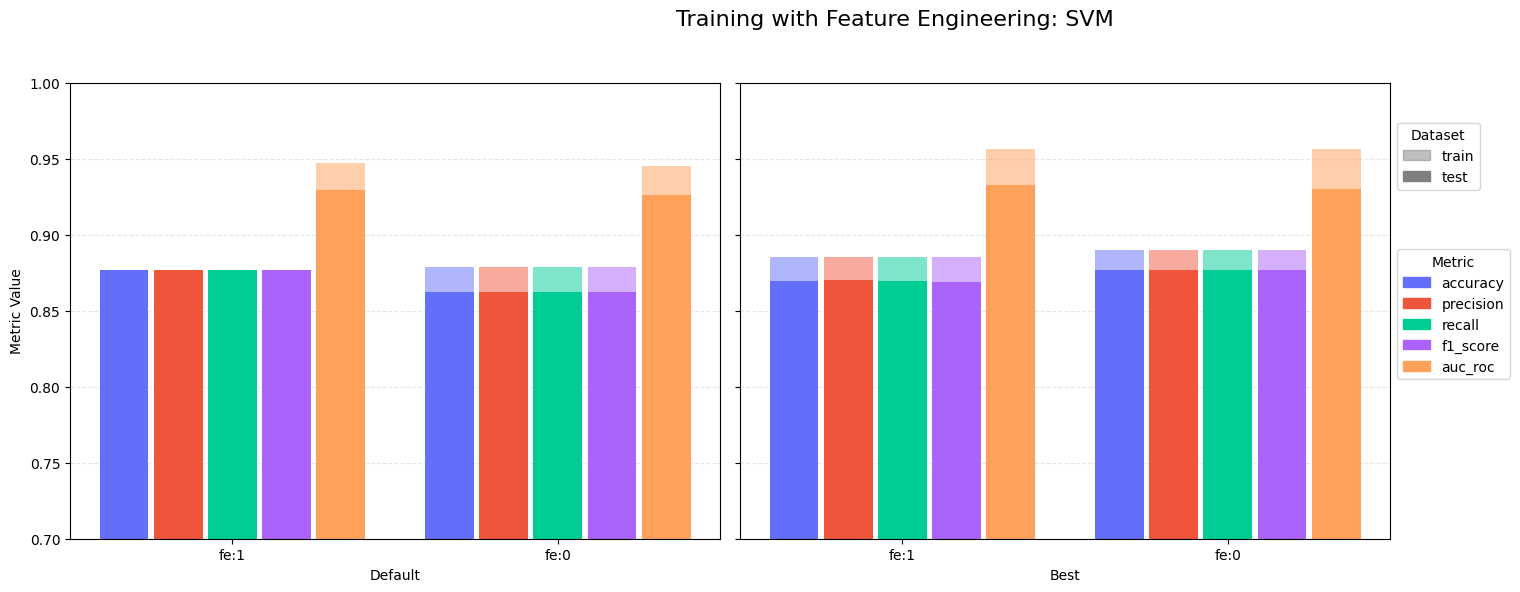

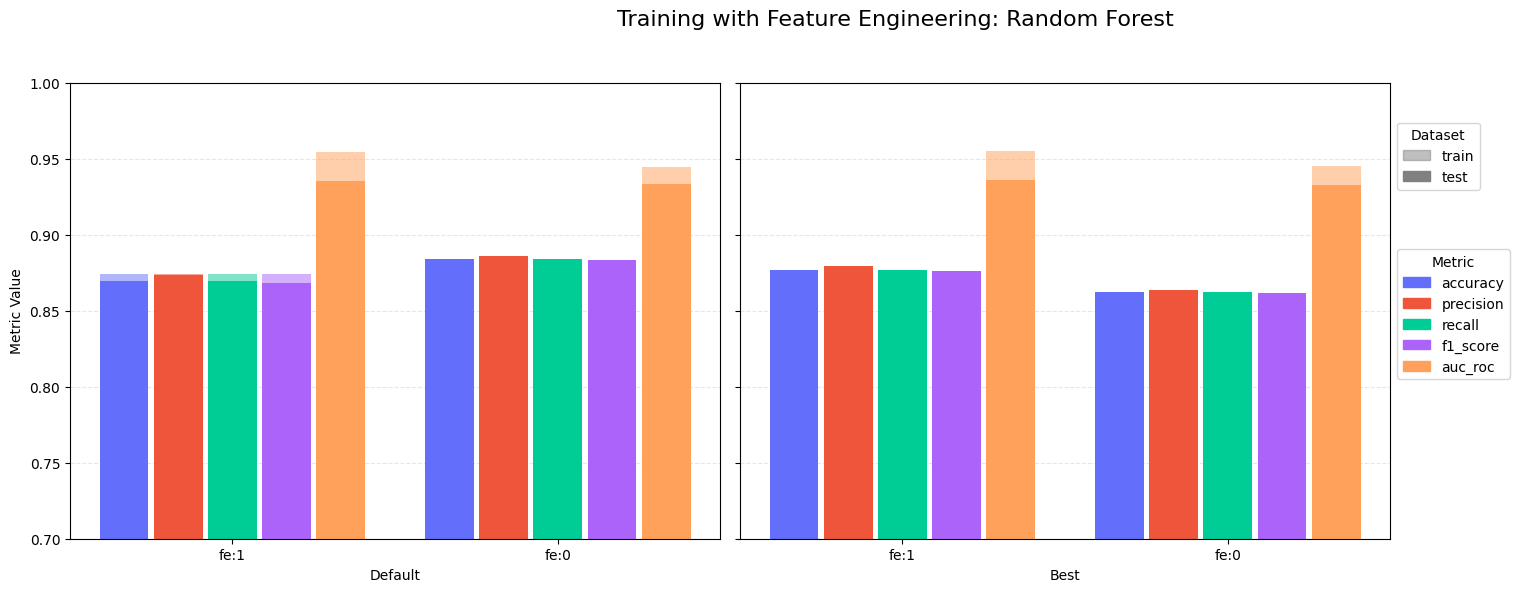

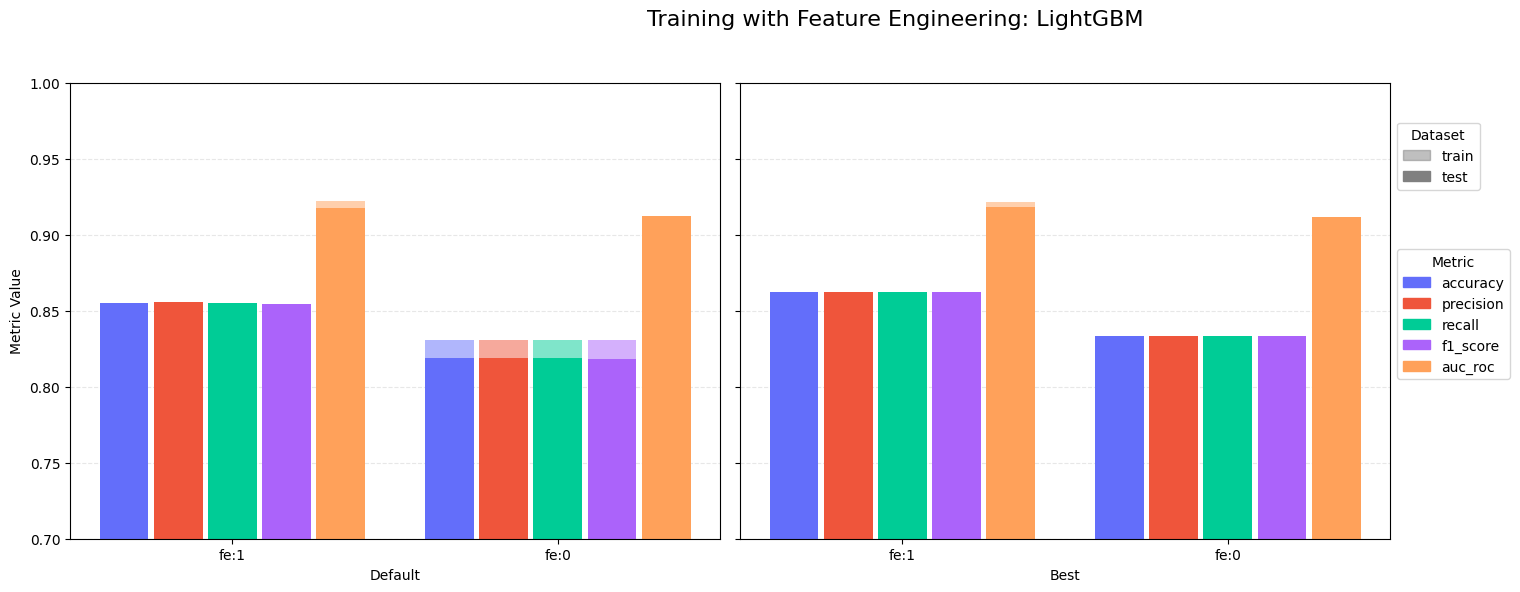

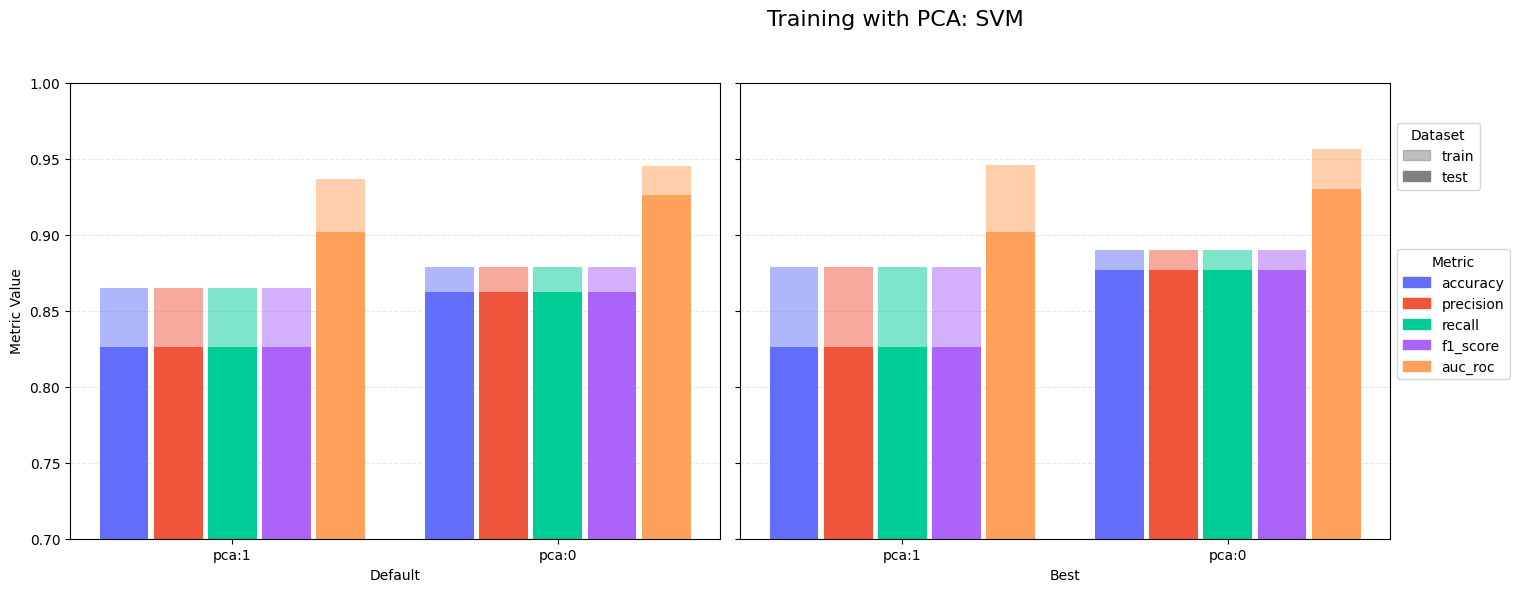

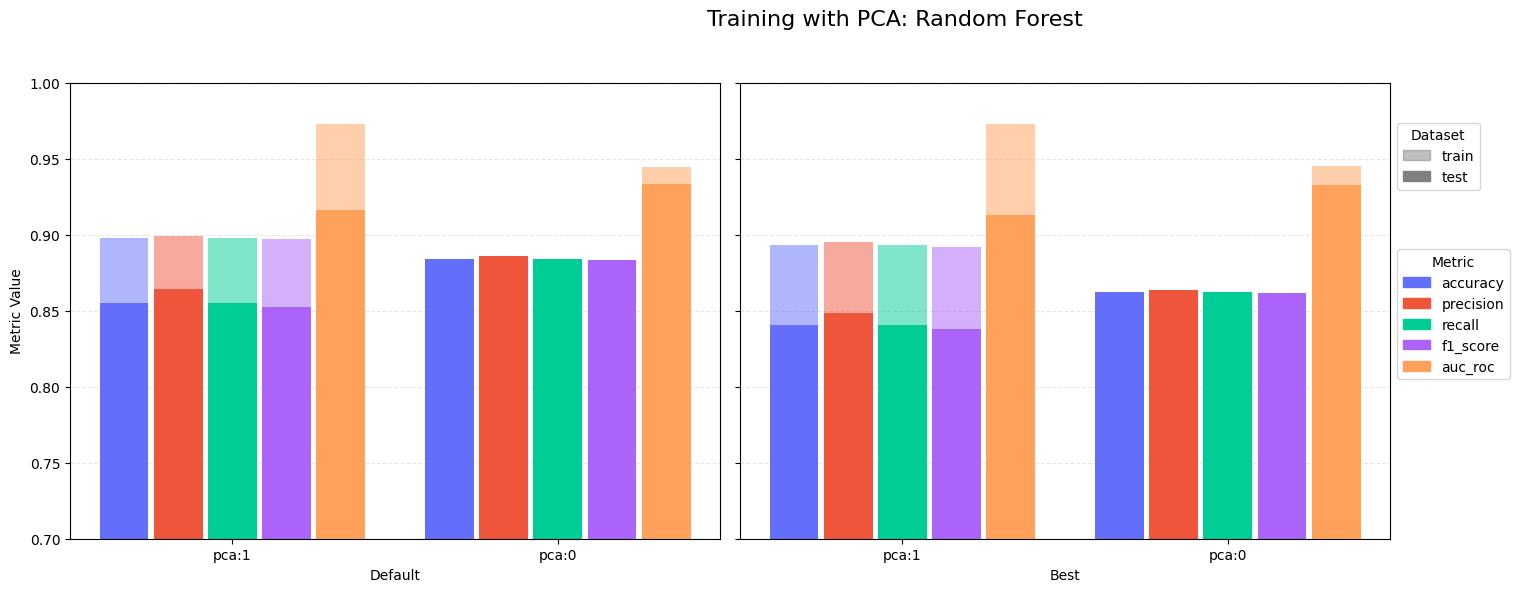

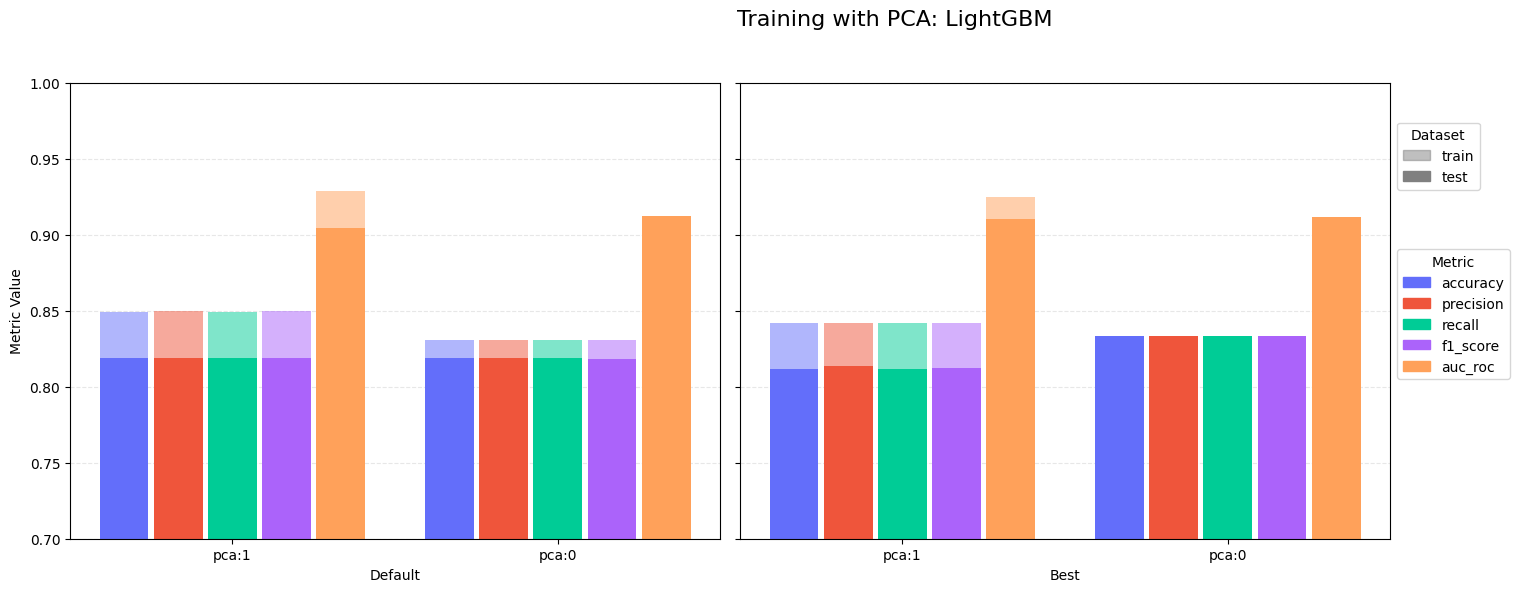

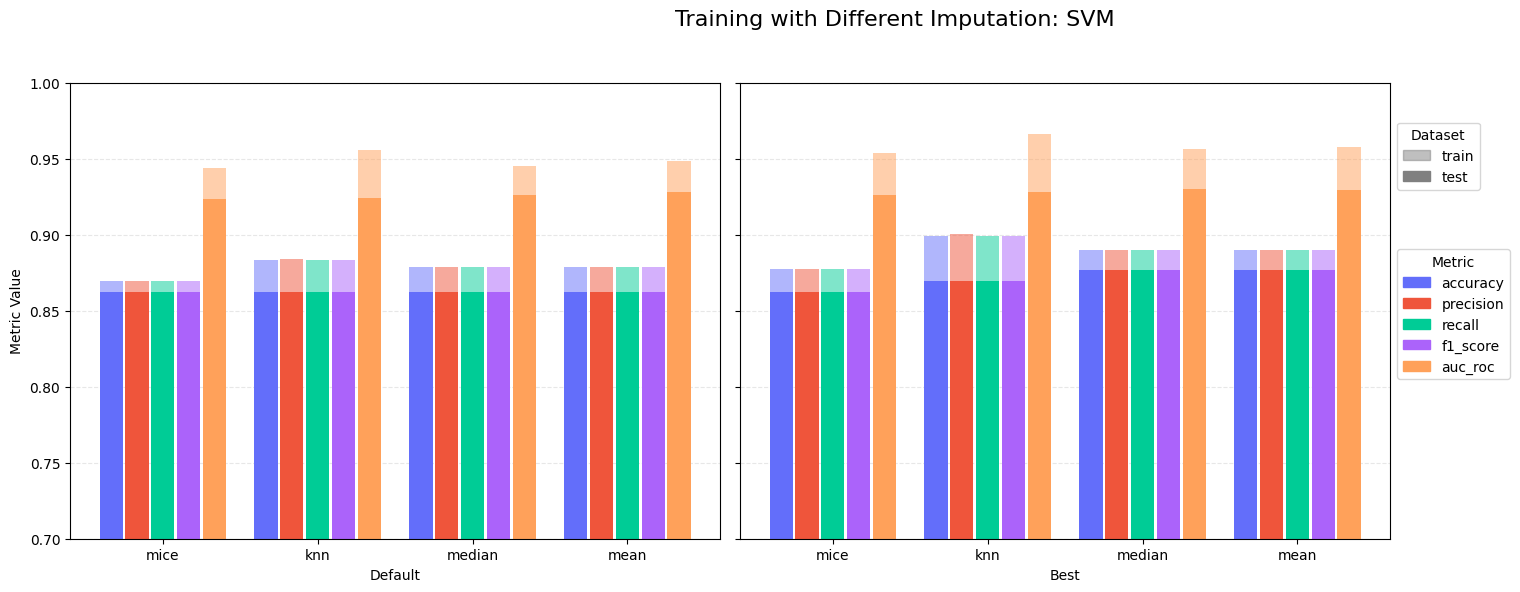

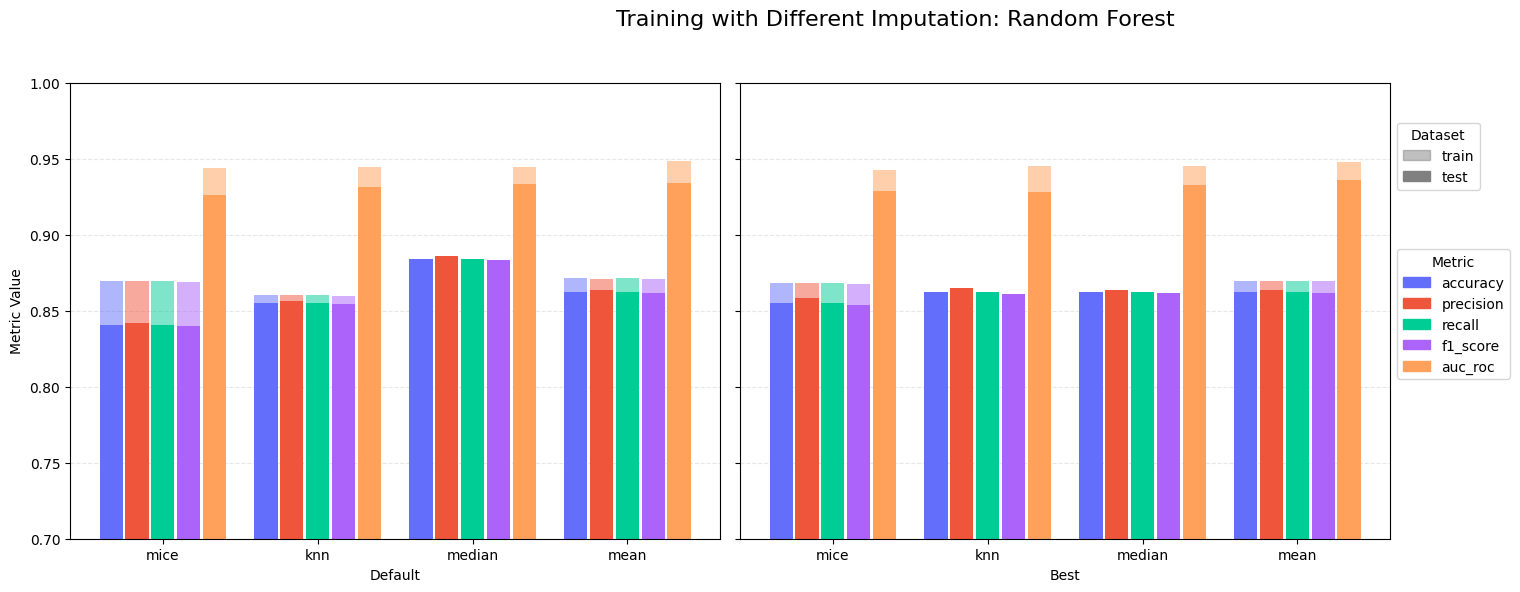

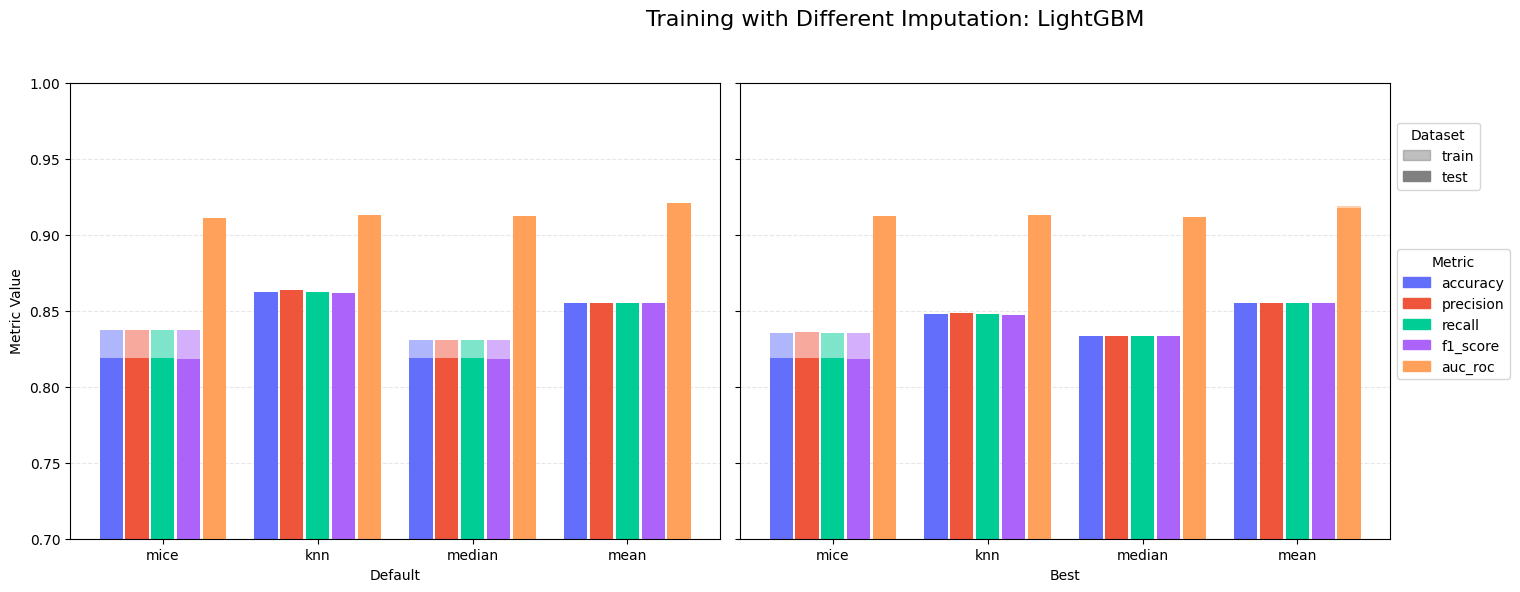

In [ ]:
# Feature Engineering
plot_metric_comparison_dual(
    results_dict=df_dict,
    model_list_1=[(11, 'svm_1', 'fe:1'), (12, 'svm_1', 'fe:0')],
    model_list_2=[(11, 'svm_3', 'fe:1'), (12, 'svm_3', 'fe:0')],
    super_title="Training with Feature Engineering: SVM"
)

plot_metric_comparison_dual(
    results_dict=df_dict,
    model_list_1=[(11, 'random_forest_1', 'fe:1'), (12, 'random_forest_1', 'fe:0')],
    model_list_2=[(11, 'random_forest_9', 'fe:1'), (12, 'random_forest_9', 'fe:0')],
    super_title="Training with Feature Engineering: Random Forest"
)

plot_metric_comparison_dual(
    results_dict=df_dict,
    model_list_1=[(11, 'lightgbm_1', 'fe:1'), (12, 'lightgbm_1', 'fe:0')],
    model_list_2=[(11, 'lightgbm_8', 'fe:1'), (12, 'lightgbm_8', 'fe:0')],
    super_title="Training with Feature Engineering: LightGBM"
)

# === PCA ===
plot_metric_comparison_dual(
    results_dict=df_dict,
    model_list_1=[(10, 'svm_1', 'pca:1'), (12, 'svm_1', 'pca:0')],
    model_list_2=[(10, 'svm_3', 'pca:1'), (12, 'svm_3', 'pca:0')],
    super_title="Training with PCA: SVM"
)

plot_metric_comparison_dual(
    results_dict=df_dict,
    model_list_1=[(10, 'random_forest_1', 'pca:1'), (12, 'random_forest_1', 'pca:0')],
    model_list_2=[(10, 'random_forest_9', 'pca:1'), (12, 'random_forest_9', 'pca:0')],
    super_title="Training with PCA: Random Forest"
)

plot_metric_comparison_dual(
    results_dict=df_dict,
    model_list_1=[(10, 'lightgbm_1', 'pca:1'), (12, 'lightgbm_1', 'pca:0')],
    model_list_2=[(10, 'lightgbm_8', 'pca:1'), (12, 'lightgbm_8', 'pca:0')],
    super_title="Training with PCA: LightGBM"
)

# Imputation
plot_metric_comparison_dual(
    results_dict=df_dict,
    model_list_1=[(4, 'svm_1', 'mice'), (8, 'svm_1', 'knn'), (12, 'svm_1', 'median'), (16, 'svm_1', 'mean')],
    model_list_2=[(4, 'svm_3', 'mice'), (8, 'svm_3', 'knn'), (12, 'svm_3', 'median'), (16, 'svm_3', 'mean')],
    super_title="Training with Different Imputation: SVM"
)

plot_metric_comparison_dual(
    results_dict=df_dict,
    model_list_1=[(4, 'random_forest_1', 'mice'), (8, 'random_forest_1', 'knn'), (12, 'random_forest_1', 'median'), (16, 'random_forest_1', 'mean')],
    model_list_2=[(4, 'random_forest_9', 'mice'), (8, 'random_forest_9', 'knn'), (12, 'random_forest_9', 'median'), (16, 'random_forest_9', 'mean')],
    super_title="Training with Different Imputation: Random Forest"
)

plot_metric_comparison_dual(
    results_dict=df_dict,
    model_list_1=[(4, 'lightgbm_1', 'mice'), (8, 'lightgbm_1', 'knn'), (12, 'lightgbm_1', 'median'), (16, 'lightgbm_1', 'mean')],
    model_list_2=[(4, 'lightgbm_8', 'mice'), (8, 'lightgbm_8', 'knn'), (12, 'lightgbm_8', 'median'), (16, 'lightgbm_8', 'mean')],
    super_title="Training with Different Imputation: LightGBM"
)
